https://towardsdatascience.com/multiclass-classification-using-k-nearest-neighbours-ca5281a9ef76

https://trenton3983.github.io/files/projects/2020-10-14_supervised_learning_sklearn/2020-10-14_supervised_learning_sklearn.html

In [15]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [16]:
from sklearn.datasets import load_iris, load_digits

Type: <class 'sklearn.utils._bunch.Bunch'>
Keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Data Type: <class 'numpy.ndarray'>
Target Type: <class 'numpy.ndarray'>
Data Shape: (150, 4)
Target Names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,label
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


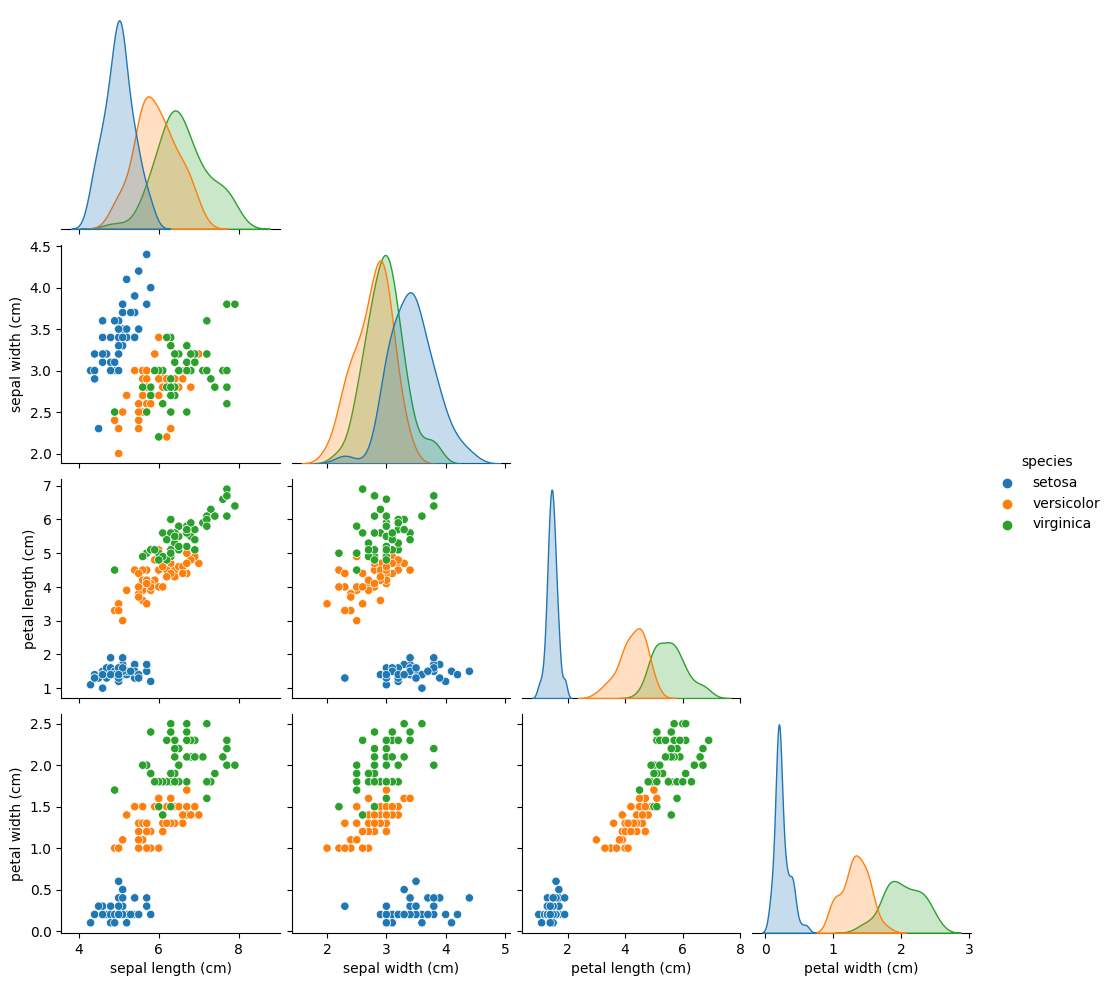

In [17]:
iris = load_iris()
print(f'Type: {type(iris)}')
print(f'Keys: {iris.keys()}')
print(f'Data Type: {type(iris.data)}\nTarget Type: {type(iris.target)}')
print(f'Data Shape: {iris.data.shape}')
print(f'Target Names: {iris.target_names}')

X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['label'] = y
species_map = dict(zip(range(3), iris.target_names))
df['species'] = df.label.map(species_map)
df = df.reindex(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species', 'label'], axis=1)
display(df.head())

# pd.plotting.scatter_matrix(df, c=y, figsize=(12, 10))
sns.pairplot(df.iloc[:, :5], hue='species', corner=True)
plt.show()

In [14]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,label
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [26]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species', 'label'],
      dtype='object')

In [18]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [19]:
df.isnull().values.any()

False

In [22]:
df['species'] = df['species'].map({'setosa' :0, 'versicolor' :1, 'virginica' :2}).astype(int)


c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


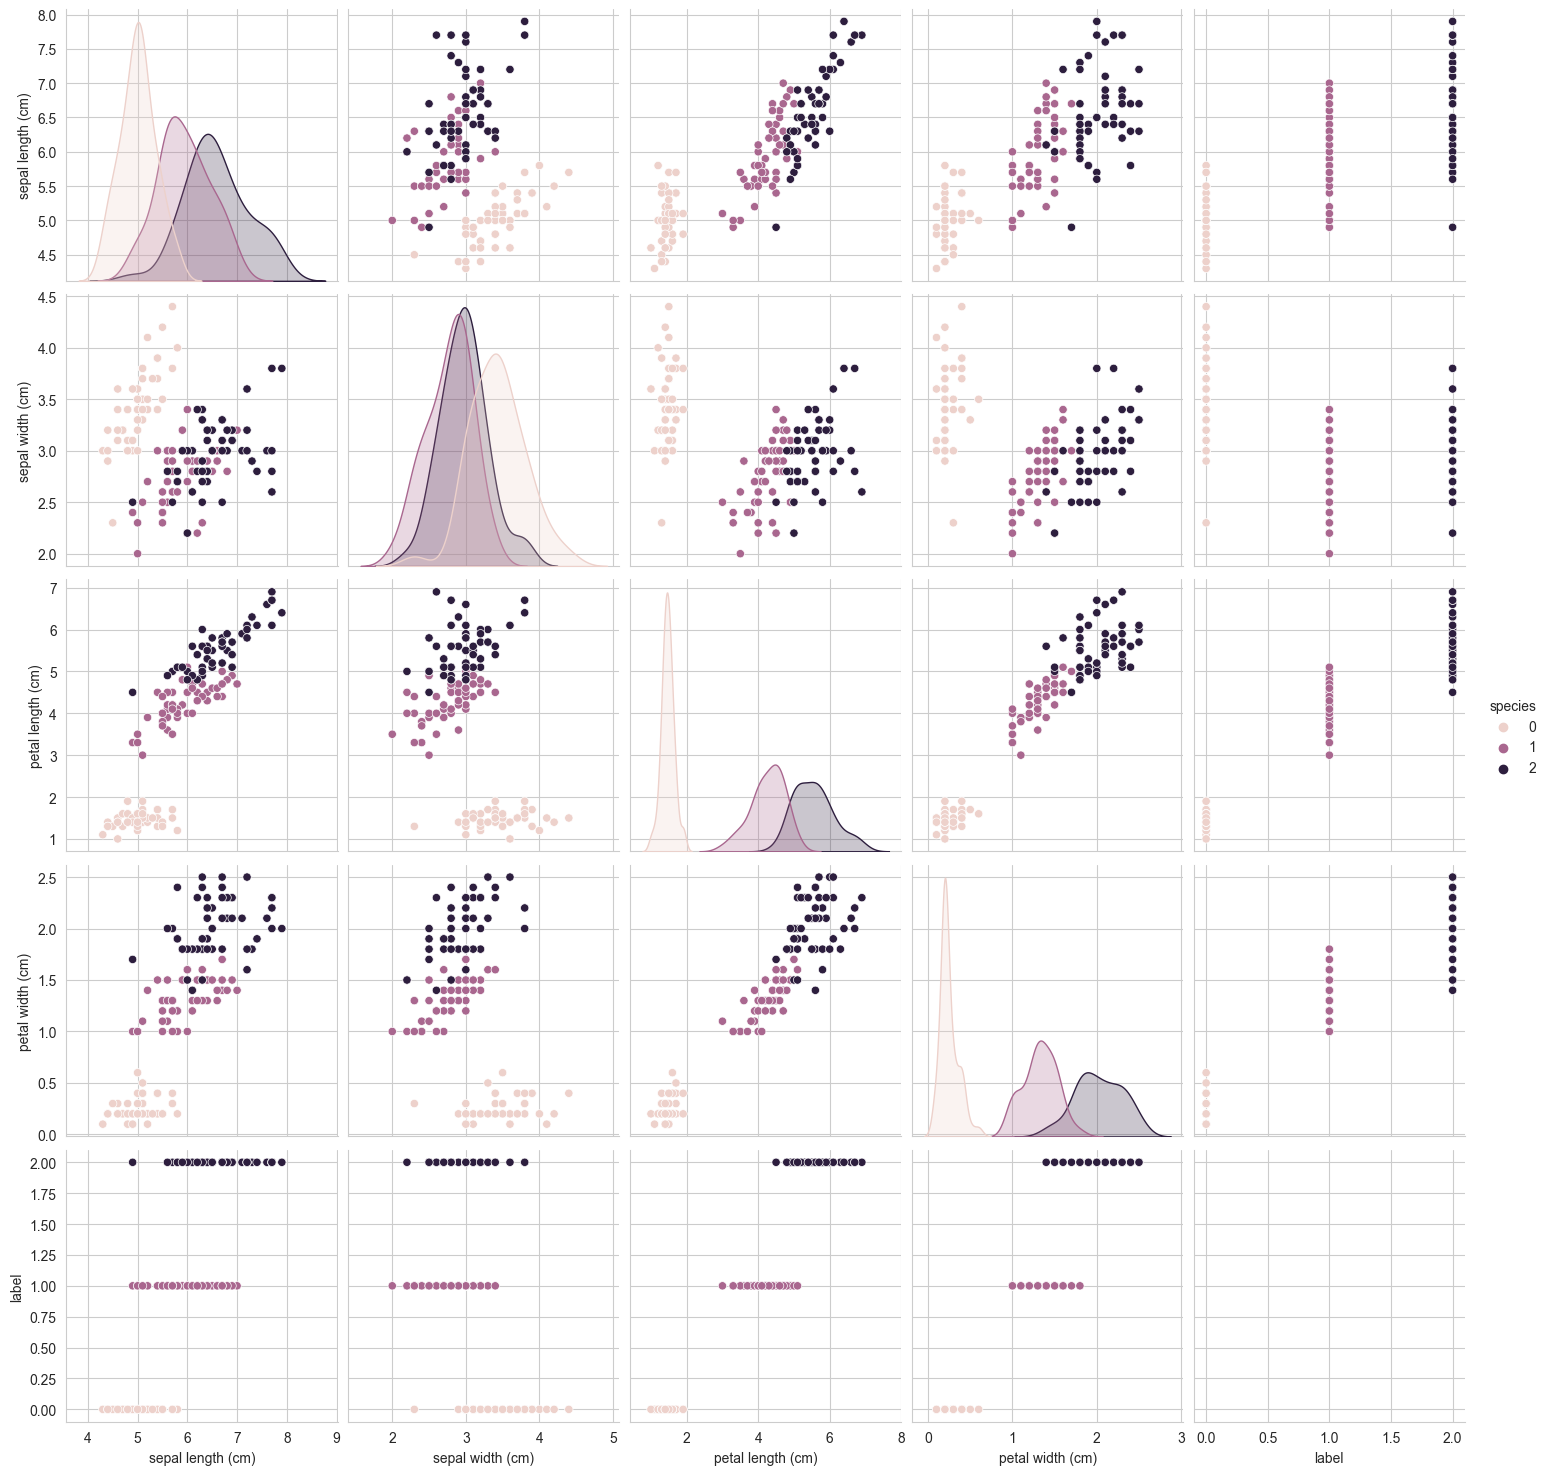

In [23]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(df, hue='species', height=3);
plt.show()

c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


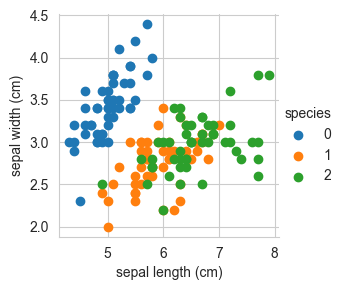

In [27]:
sns.set_style('whitegrid');
sns.FacetGrid(df, hue='species') \
.map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)') \
.add_legend();
plt.show()

In [42]:
x_data = df.drop(['species', 'label'],axis=1)
y_data = df['species']
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)


In [43]:
X_data_minmax.shape

(150, 4)

In [44]:
data = pd.DataFrame(X_data_minmax,columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)'])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Confusion Matrix:
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667
